In [2]:
            # pip install keras-transformer
# pip install hyperopt

In [3]:
# import pandas as pd
# import numpy as np

# df = pd.read_csv(f'./DNN-EdgeIIoT-dataset.csv', low_memory=False) 
# df.head(5)
# print(df['Attack_type'].value_counts())

In [4]:
# from sklearn.utils import shuffle
# drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
#                 "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
#                 "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
#                 "tcp.dstport", "udp.port", "mqtt.msg","icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as","Attack_label"]

# df.drop(drop_columns, axis=1, inplace=True)
# df.dropna(axis=0, how='any', inplace=True)
# df.drop_duplicates(subset=None, keep="first", inplace=True)
# df = shuffle(df)
# df.isna().sum()
# print(df['Attack_type'].value_counts())

In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing

# def encode_text_dummy(df, name):
#     dummies = pd.get_dummies(df[name])
#     for x in dummies.columns:
#         dummy_name = f"{name}-{x}"
#         df[dummy_name] = dummies[x]
#     df.drop(name, axis=1, inplace=True)
    
# encode_text_dummy(df,'http.request.method')
# encode_text_dummy(df,'http.referer')
# encode_text_dummy(df,"http.request.version")
# encode_text_dummy(df,"dns.qry.name.len")
# encode_text_dummy(df,"mqtt.conack.flags")
# encode_text_dummy(df,"mqtt.protoname")
# encode_text_dummy(df,"mqtt.topic")

In [6]:
# df.to_csv('preprocessed_DNN2.csv', encoding='utf-8', index=False)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('./preprocessed_DNN2.csv', low_memory=False) 
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
0,0.0,0.0,0.0,0.0,0.0,0.0,193293683.0,1.332146e+09,10309.0,0.0,...,False,False,False,False,True,False,False,True,False,False
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,...,False,False,False,False,False,True,False,False,True,False
2,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.982540e+09,54699.0,1.0,...,False,False,False,False,True,False,False,True,False,False
3,0.0,0.0,0.0,0.0,0.0,0.0,121.0,1.365450e+09,29437.0,0.0,...,False,False,False,False,False,True,False,False,True,False
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.965167e+09,2020.0,0.0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909666,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.654419e+08,18431.0,1.0,...,False,False,False,False,True,False,False,True,False,False
1909667,0.0,0.0,0.0,0.0,0.0,0.0,59.0,1.157507e+09,64406.0,1.0,...,False,False,False,False,True,False,False,True,False,False
1909668,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.064683e+09,63812.0,0.0,...,False,False,False,False,True,False,False,True,False,False
1909669,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.198322e+08,31907.0,0.0,...,False,False,False,False,False,False,True,True,False,False


In [2]:
feat_cols = list(df.columns)
# label = "Attack_type"

# feat_cols.remove(label)
feat_cols
len(feat_cols)


92

In [3]:
empty_cols = [col for col in df.columns if df[col].isnull().all()]
empty_cols

[]

In [4]:
# skip_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]
# # df[skip_list[3]].value_counts()

# df.drop(skip_list, axis=1, inplace=True)
# feat_cols = list(df.columns)
# feat_cols.remove(label)
feat_cols

['arp.opcode',
 'arp.hw.size',
 'icmp.checksum',
 'icmp.seq_le',
 'http.content_length',
 'http.response',
 'tcp.ack',
 'tcp.ack_raw',
 'tcp.checksum',
 'tcp.connection.fin',
 'tcp.connection.rst',
 'tcp.connection.syn',
 'tcp.connection.synack',
 'tcp.flags',
 'tcp.flags.ack',
 'tcp.len',
 'tcp.seq',
 'udp.stream',
 'udp.time_delta',
 'dns.qry.name',
 'dns.qry.qu',
 'dns.retransmission',
 'dns.retransmit_request',
 'dns.retransmit_request_in',
 'mqtt.conflag.cleansess',
 'mqtt.conflags',
 'mqtt.hdrflags',
 'mqtt.len',
 'mqtt.msgtype',
 'mqtt.proto_len',
 'mqtt.topic_len',
 'mqtt.ver',
 'mbtcp.len',
 'mbtcp.trans_id',
 'mbtcp.unit_id',
 'Attack_type',
 'http.request.method-0',
 'http.request.method-0.0',
 'http.request.method-GET',
 'http.request.method-OPTIONS',
 'http.request.method-POST',
 'http.request.method-PROPFIND',
 'http.request.method-PUT',
 'http.request.method-SEARCH',
 'http.request.method-TRACE',
 'http.referer-() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo

In [5]:
#drop na values and reset index
data_clean = df.dropna().reset_index()

# Checkng for DUPLICATE values
data_clean.drop_duplicates(keep='first', inplace = True)

data_clean['Attack_type'].value_counts()

print("Read {} rows.".format(len(data_clean)))

Read 1909671 rows.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


#drop na values and reset index
data_clean = df.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Attack_type'] = labelencoder.fit_transform(data_clean['Attack_type'])

data_clean['Attack_type'].value_counts()

data_np = data_clean.to_numpy(dtype="float32")
data_np = data_np[~np.isinf(data_np).any(axis=1)]

#del df

# Replace "Attack_type" with the actual column name you want to encode
column_name_to_encode = "Attack_type"

# Find the column number dynamically
column_num_to_encode = df.columns.get_loc(column_name_to_encode)

# Extract features (X) from column 0 to 93 (excluding Attack_type)
X = data_np[:, 0:column_num_to_encode]
X = np.concatenate((X, data_np[:, column_num_to_encode+2:93]), axis=1)

# Use OneHotEncoder on the specified column
enc = OneHotEncoder()
y = enc.fit_transform(data_np[:, column_num_to_encode+1:column_num_to_encode+2]).toarray()

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = y.shape[1]

In [8]:
print(X.shape,y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1909671, 91) (1909671, 15)
(1432253, 91) (477418, 91) (1432253, 15) (477418, 15)


In [9]:
# DNN
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics

import uuid
import gc
from tensorflow import keras
import tensorflow as tf

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import wandb

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_fine_tune')

# Simple 4 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks (including WandB callback)
callbacks = [
    EarlyStopping(monitor='loss', patience=10),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
    wandb.keras.WandbCallback()
]

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 30:
        return 0.0002  # First 30 epochs with this learning rate
    elif epoch < 60:
        return 0.0002/4  # Next 30 epochs with a lower learning rate
    else:
        return 0.0002/6  # Last 30 epochs with an even lower learning rate

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with WandB logging and learning rate schedule
history = model.fit(
    X_train, y_train,
    batch_size=256,
    epochs=90,  # Total epochs for fine-tuning
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=[callbacks, lr_scheduler]
)

In [15]:
model.save('model3_dnn.h5')

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import wandb

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_fine_tune_validate')

start = dt.datetime.now()

escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


accuracy,▁▆▇█████████████████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,██████████████▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆██████████████████████████████████████
val_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.94967
best_epoch,80
best_val_loss,0.01162
epoch,89
loss,0.0116


14920/14920 [==============================] - 14s 955us/step
Completed
Time taken: 0:00:38.984517
Validation score: 0.9494426267966436
Evaluation score: [0.011626887135207653, 0.9494426250457764]
Recall score: 0.9494426267966436
Precision score: 0.9538557754609223
F1 Measure score: 0.9470949424390542
ROC-AUC score: 0.884299820661651


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


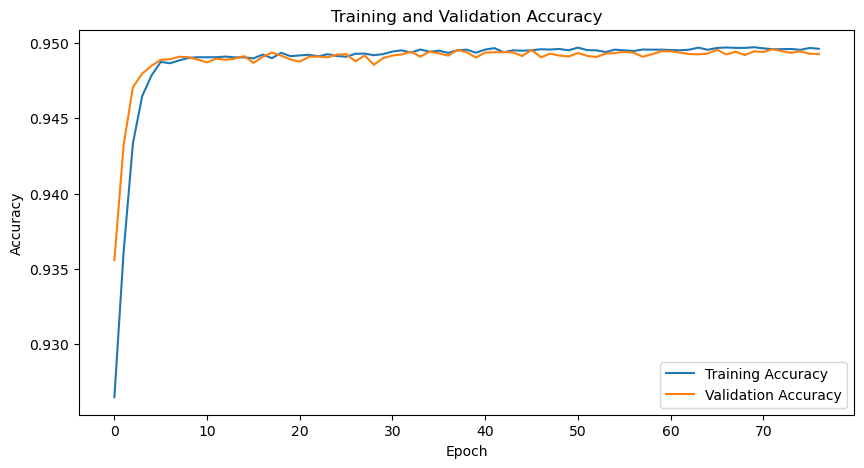

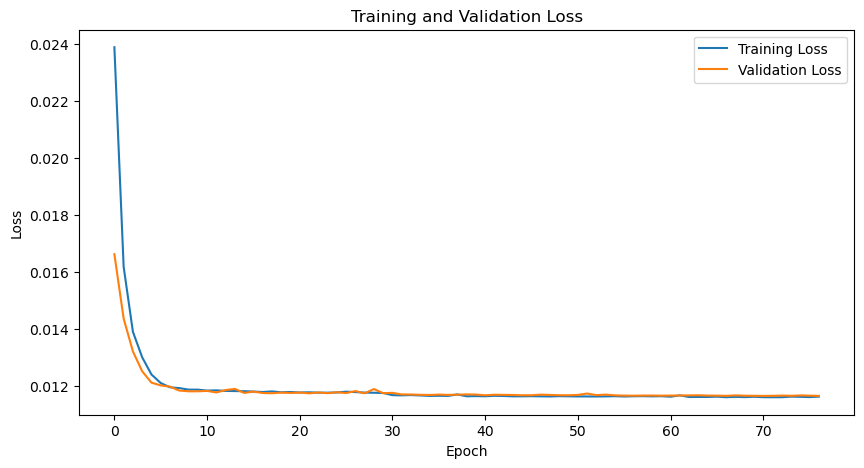

In [17]:
import wandb
import matplotlib.pyplot as plt

# Log in to WandB (if not already logged in)
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
run_path = "ganmaster/dnn_fine_tune/3hnt8aem"
api = wandb.Api()
run = api.run(run_path)

# Access logged metrics
history = run.scan_history()

# Plot accuracy and val_accuracy
epochs = []
train_accuracy = []
val_accuracy = []

for entry in history:
    if 'accuracy' in entry:
        epochs.append(entry['epoch'])
        train_accuracy.append(entry['accuracy'])
        val_accuracy.append(entry['val_accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('accuracy_plot.png')  # Save the plot
plt.show()

# Plot loss and val_loss
train_loss = []
val_loss = []

for entry in history:
    if 'loss' in entry:
        train_loss.append(entry['loss'])
        val_loss.append(entry['val_loss'])

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot.png')  # Save the plot
plt.show()


14920/14920 [==============================] - 14s 969us/step


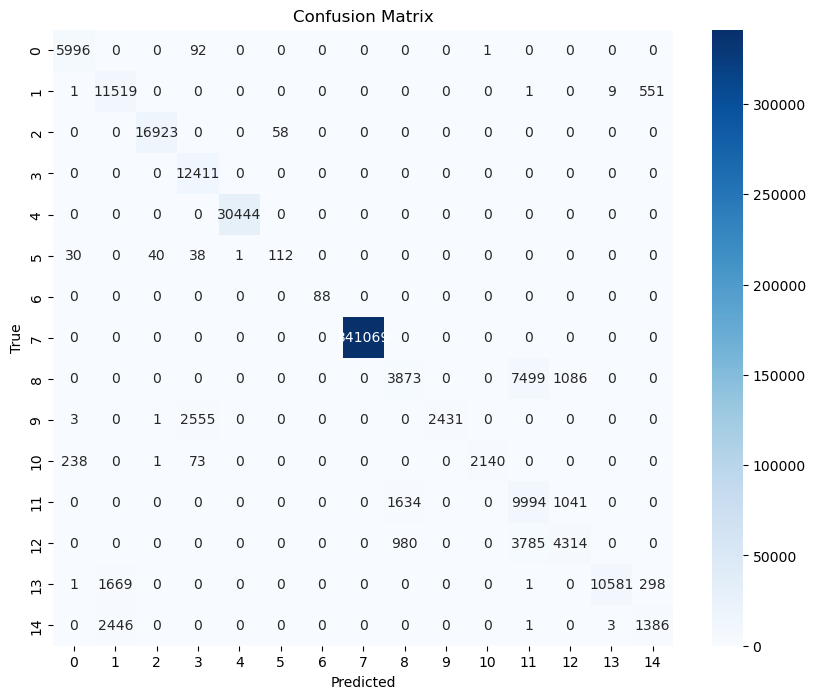

Evaluation score: [0.011626887135207653, 0.9494426250457764]
Precision: 0.9538557754609223
Recall: 0.9494426267966436
F1 Score: 0.9470949424390542
ROC-AUC Score: 0.9962878582096791

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      6089
           1       0.74      0.95      0.83     12081
           2       1.00      1.00      1.00     16981
           3       0.82      1.00      0.90     12411
           4       1.00      1.00      1.00     30444
           5       0.66      0.51      0.57       221
           6       1.00      1.00      1.00        88
           7       1.00      1.00      1.00    341069
           8       0.60      0.31      0.41     12458
           9       1.00      0.49      0.66      4990
          10       1.00      0.87      0.93      2452
          11       0.47      0.79      0.59     12669
          12       0.67      0.48      0.56      9079
          13       1.00      0.84    

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# ... (previous code remains unchanged)

# Evaluate the model on the test set
escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
y_eval_classes = np.argmax(y_test, axis=1)

# Confusion matrix
conf_mat = confusion_matrix(y_eval_classes, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(n_classes)], yticklabels=[str(i) for i in range(n_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_eval_classes, pred_classes)

# Additional metrics
precision = precision_score(y_eval_classes, pred_classes, average='weighted')
recall = recall_score(y_eval_classes, pred_classes, average='weighted')
f1 = f1_score(y_eval_classes, pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, pred, multi_class='ovr')

print('Evaluation score:', escore)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC Score:', roc_auc)
print('\nClassification Report:\n', class_report)


In [19]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# # Resample with SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_scaled,y)

# # Split the resampled data set into training and testing with stratification
# X_train1, X_test1, y_train1, y_test1 = train_test_split(
#     X_resampled, y_resampled, test_size=0.25, random_state=2, shuffle=True, stratify=y_resampled
# )


In [10]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled data
print(X_train_resampled.shape, y_train_resampled.shape)


(15348120, 91) (15348120, 15)


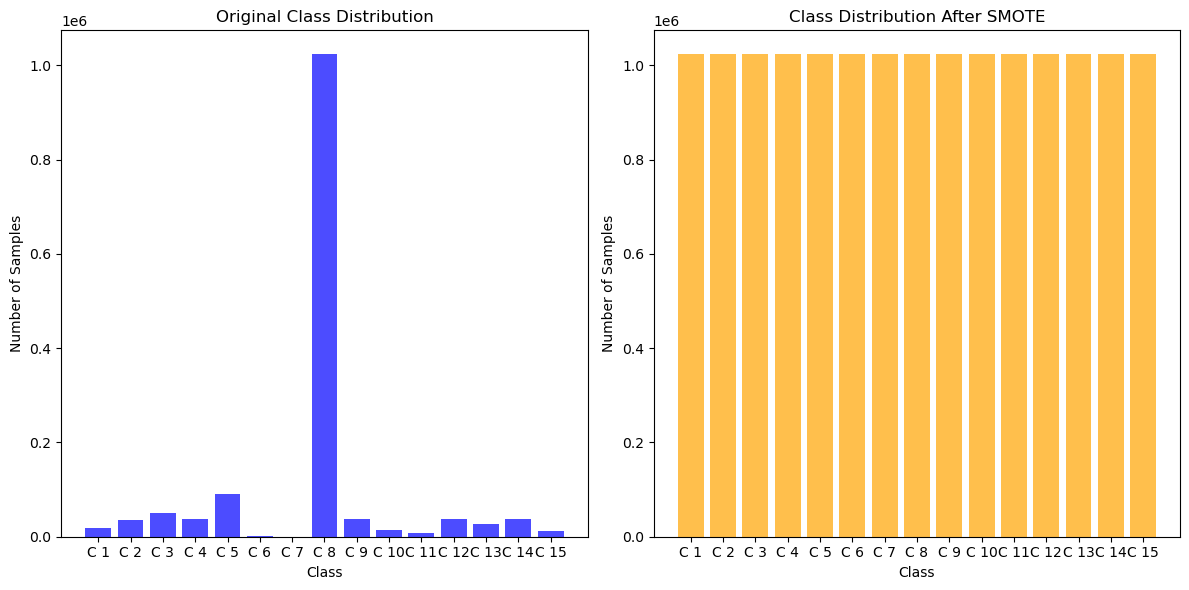

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of samples in each class before and after SMOTE
original_class_counts = np.sum(y_train, axis=0)
resampled_class_counts = np.sum(y_train_resampled, axis=0)

# Define class labels
class_labels = [f'C {i+1}' for i in range(n_classes)]

# Plot the bar graph for the original class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(class_labels, original_class_counts, color='blue', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Original Class Distribution')

# Plot the bar graph for the class distribution after SMOTE
plt.subplot(1, 2, 2)
plt.bar(class_labels, resampled_class_counts, color='orange', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()


In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import wandb


# Check GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set GPU configuration
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_fine_tune_smote')

# Simple 4 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks (including WandB callback)
callbacks = [
    EarlyStopping(monitor='loss', patience=15),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001),
    wandb.keras.WandbCallback()
]

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 40:
        return 0.0004  # First 30 epochs with this learning rate
    elif epoch < 70:
        return 0.0004/4  # Next 30 epochs with a lower learning rate
    else:
        return 0.0004/8  # Last 30 epochs with an even lower learning rate

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with WandB logging and learning rate schedule
history = model.fit(
    X_train_resampled, y_train_resampled,
    batch_size=256,
    epochs=100,  # Total epochs for fine-tuning
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=[callbacks, lr_scheduler]
)

Num GPUs Available:  0


wandb: Currently logged in as: ogoni202046 (ganmaster). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Momrez/.netrc


Problem at: C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\wandb\sdk\wandb_init.py 848 getcaller


KeyboardInterrupt: 

In [12]:
model.save('model3_dnn_smote.h5')

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


accuracy,▁▄▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇██████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▂▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁
lr,████████████████▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▂▃▃▃▃▂▅▅▆▅▄▄▅▅▆▆▆▆▇▆▇▇█▇▇▇▇▇▇▇▇█▇▇▇█▇▇▇
val_loss,▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.8317
best_epoch,58
best_val_loss,0.01262
epoch,99
loss,0.04007


14920/14920 [==============================] - 13s 871us/step


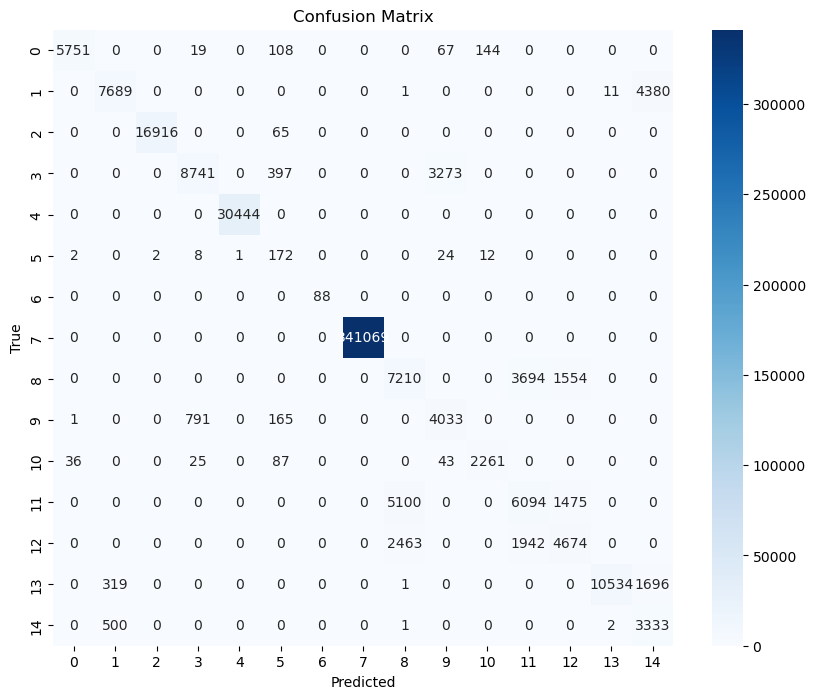

Completed
Time taken: 0:01:09.343161
Validation score: 0.9404944932951836
Evaluation score: [0.012895768508315086, 0.9404944777488708]
Recall score: 0.9404944932951836
Precision score: 0.9508739555137761
F1 Measure score: 0.9431349957852393
ROC-AUC score: 0.9004058181352088
Evaluation score: [0.012895768508315086, 0.9404944777488708]
Precision: 0.9508739555137761
Recall: 0.9404944932951836
F1 Score: 0.9431349957852393
ROC-AUC Score: 0.996219855523595

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      6089
           1       0.90      0.64      0.75     12081
           2       1.00      1.00      1.00     16981
           3       0.91      0.70      0.79     12411
           4       1.00      1.00      1.00     30444
           5       0.17      0.78      0.28       221
           6       1.00      1.00      1.00        88
           7       1.00      1.00      1.00    341069
           8       0.49      0.58

In [13]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import wandb
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_fine_tune_validate_smote')

start = dt.datetime.now()

escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

# Evaluate the model on the test set
escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
y_eval_classes = np.argmax(y_test, axis=1)

# Confusion matrix
conf_mat = confusion_matrix(y_eval_classes, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(n_classes)], yticklabels=[str(i) for i in range(n_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_eval_classes, pred_classes)

# Additional metrics
precision = precision_score(y_eval_classes, pred_classes, average='weighted')
recall = recall_score(y_eval_classes, pred_classes, average='weighted')
f1 = f1_score(y_eval_classes, pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, pred, multi_class='ovr')

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

# New metrics
print('Evaluation score:', escore)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC Score:', roc_auc)
print('\nClassification Report:\n', class_report)


In [17]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features: {}".format(categorical_features))


Categorical Features: ['Attack_type']


In [18]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(df, categorical_features, epochs = 200)

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Gen. (2.10) | Discrim. (0.76): 100%|██████████| 200/200 [22:19:25<00:00, 401.83s/it]     


In [19]:
import pickle

# Assuming 'ctgan' is already trained using the code you provided

# Save the trained CTGAN model to a file
with open('ctgan_model.pkl', 'wb') as model_file:
    pickle.dump(ctgan, model_file)

print("CTGAN model saved successfully.")


CTGAN model saved successfully.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
# Load the saved CTGAN model from a file
with open('ctgan_model.pkl', 'rb') as model_file:
    loaded_ctgan = pickle.load(model_file)

# Now 'loaded_ctgan' contains the loaded CTGAN model


In [2]:
samples = loaded_ctgan.sample(3500000)

In [3]:
samples.to_csv('preprocessed_DNN2_Gan.csv', encoding='utf-8', index=False)

In [13]:
df2 = pd.read_csv('./preprocessed_DNN2_Gan.csv', low_memory=False) 
df2

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0,mqtt.protoname-0.0,mqtt.protoname-MQTT,mqtt.topic-0,mqtt.topic-0.0,mqtt.topic-Temperature_and_Humidity
0,-0.000019,0.000034,1.408090,-9.241821,0.122246,-0.000332,-117782.552345,1.513673e+09,53955.835696,-0.000486,...,True,True,True,True,True,True,True,True,True,True
1,-0.000051,0.001010,-4.828265,0.358450,0.006022,-0.000540,166688.759912,1.896773e+09,46441.952145,0.000118,...,True,True,True,True,True,True,True,True,True,True
2,-0.000037,0.000076,-1.752366,-12.230753,0.008623,-0.000225,-730184.765627,2.314530e+09,56450.450148,-0.000798,...,True,True,True,True,True,True,True,True,True,True
3,-0.000852,0.000687,-5.573714,5.885318,-0.057382,-0.000646,-176383.851419,8.584967e+08,23780.230033,-0.000709,...,True,True,True,True,True,True,True,True,True,True
4,0.001046,0.000435,-1.585131,-12.213119,0.031667,-0.000132,-277310.516190,3.082191e+09,5067.520895,-0.000078,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499995,-0.000138,-0.000302,0.949070,-0.652015,-0.085409,-0.000560,515911.183820,1.461707e+08,53438.588347,-0.000521,...,True,True,True,True,True,True,True,True,True,True
3499996,0.000759,-0.000480,6.736571,-11.974173,0.049564,0.000039,-267118.110208,6.781586e+08,30334.079871,1.000677,...,True,True,True,True,True,True,True,True,True,True
3499997,0.000285,0.000056,-2.877747,-5.086408,0.006254,-0.000230,-35197.338887,2.060059e+09,35358.549326,-0.000434,...,True,True,True,True,True,True,True,True,True,True
3499998,0.000036,-0.000123,-4.613207,1.458200,0.062598,0.000687,216360.552777,6.594439e+05,36674.801521,0.000141,...,True,True,True,True,True,True,True,True,True,True


In [14]:
empty_cols = [col for col in df2.columns if df2[col].isnull().all()]

#drop na values and reset index
data_clean = df2.dropna().reset_index()

# Checkng for DUPLICATE values
data_clean.drop_duplicates(keep='first', inplace = True)

data_clean['Attack_type'].value_counts()

print("Read {} rows.".format(len(data_clean)))

Read 3500000 rows.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


#drop na values and reset index
data_clean = df2.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Attack_type'] = labelencoder.fit_transform(data_clean['Attack_type'])

data_clean['Attack_type'].value_counts()

data_np = data_clean.to_numpy(dtype="float32")
data_np = data_np[~np.isinf(data_np).any(axis=1)]

#del df

# Replace "Attack_type" with the actual column name you want to encode
column_name_to_encode = "Attack_type"

# Find the column number dynamically
column_num_to_encode = df2.columns.get_loc(column_name_to_encode)

# Extract features (X) from column 0 to 93 (excluding Attack_type)
X2 = data_np[:, 0:column_num_to_encode]
X2 = np.concatenate((X2, data_np[:, column_num_to_encode+2:93]), axis=1)

# Use OneHotEncoder on the specified column
enc = OneHotEncoder()
y2 = enc.fit_transform(data_np[:, column_num_to_encode+1:column_num_to_encode+2]).toarray()

In [16]:
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

# Split the data set into training and testing
# X_train2, X_test2, y_train2, y_test2 = train_test_split(
#     X_scaled2, y2, test_size=0.01, random_state=2, shuffle=True)

_features = X2.shape[1]
n_classes = y2.shape[1]

In [17]:
print(X_scaled2.shape,y2.shape)

(3500000, 91) (3500000, 15)


In [18]:
import numpy as np
X_train2 = np.concatenate((X_train, X_scaled2), axis=0)
y_train2 = np.concatenate((y_train, y2), axis=0)

print("X_train2 shape:", X_train2.shape)
print("y_train2 shape:", y_train2.shape)


X_train2 shape: (4932253, 91)
y_train2 shape: (4932253, 15)


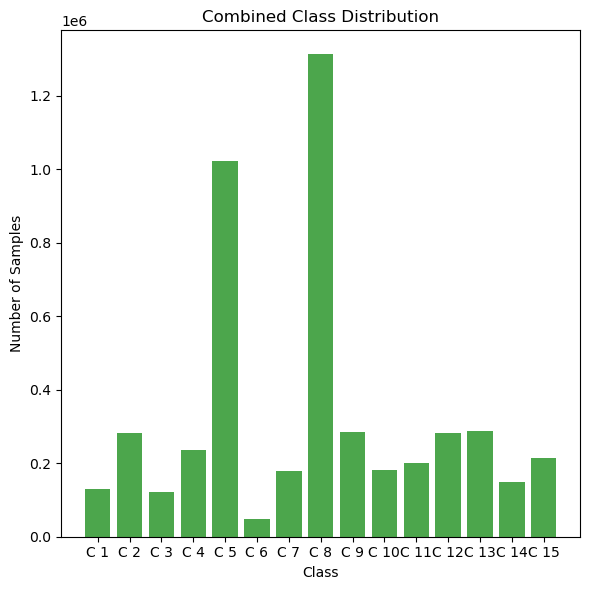

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of samples in each class before and after SMOTE
original_class_counts = np.sum(y_train2, axis=0)

# Define class labels
class_labels = [f'C {i+1}' for i in range(n_classes)]

# Plot the bar graph for the combined class distribution
plt.figure(figsize=(6, 6))
plt.bar(class_labels, original_class_counts, color='green', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Combined Class Distribution')

plt.tight_layout()
plt.show()


In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import wandb

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_fine_tune_GAN')

# Simple 4 Layer Dense Model
model = Sequential()
model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

# Compile the model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Define callbacks (including WandB callback)
callbacks = [
    EarlyStopping(monitor='loss', patience=10),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
    wandb.keras.WandbCallback()
]

# Learning rate schedule
def lr_schedule(epoch):
    if epoch < 30:
        return 0.0002  # First 30 epochs with this learning rate
    elif epoch < 60:
        return 0.0002/4  # Next 30 epochs with a lower learning rate
    else:
        return 0.0002/6  # Last 30 epochs with an even lower learning rate

lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with WandB logging and learning rate schedule
history = model.fit(
    X_train2d, y_train2,
    batch_size=256,
    epochs=90,  # Total epochs for fine-tuning
    verbose=True,
    validation_data=(X_test, y_test),
    callbacks=[callbacks, lr_scheduler]
)

wandb: Currently logged in as: ogoni202046 (ganmaster). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Momrez/.netrc



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               11776     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 96)                

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/90


24923/24931 [============================>.] - ETA: 0s - loss: 0.1604 - accuracy: 0.4543

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 94s 4ms/step - loss: 0.1604 - accuracy: 0.4543 - val_loss: 0.0164 - val_accuracy: 0.9333 - lr: 2.0000e-04
Epoch 2/90
24924/24931 [============================>.] - ETA: 0s - loss: 0.1568 - accuracy: 0.4628

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 92s 4ms/step - loss: 0.1568 - accuracy: 0.4628 - val_loss: 0.0138 - val_accuracy: 0.9414 - lr: 2.0000e-04
Epoch 3/90
24927/24931 [============================>.] - ETA: 0s - loss: 0.1559 - accuracy: 0.4657

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 92s 4ms/step - loss: 0.1559 - accuracy: 0.4657 - val_loss: 0.0131 - val_accuracy: 0.9461 - lr: 2.0000e-04
Epoch 4/90
24919/24931 [============================>.] - ETA: 0s - loss: 0.1554 - accuracy: 0.4677

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 91s 4ms/step - loss: 0.1554 - accuracy: 0.4677 - val_loss: 0.0127 - val_accuracy: 0.9460 - lr: 2.0000e-04
Epoch 5/90
24920/24931 [============================>.] - ETA: 0s - loss: 0.1546 - accuracy: 0.4706

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 91s 4ms/step - loss: 0.1546 - accuracy: 0.4706 - val_loss: 0.0122 - val_accuracy: 0.9489 - lr: 2.0000e-04
Epoch 6/90
24927/24931 [============================>.] - ETA: 0s - loss: 0.1540 - accuracy: 0.4729

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 93s 4ms/step - loss: 0.1540 - accuracy: 0.4729 - val_loss: 0.0121 - val_accuracy: 0.9490 - lr: 2.0000e-04
Epoch 7/90
24920/24931 [============================>.] - ETA: 0s - loss: 0.1535 - accuracy: 0.4744

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 91s 4ms/step - loss: 0.1535 - accuracy: 0.4744 - val_loss: 0.0119 - val_accuracy: 0.9487 - lr: 2.0000e-04
Epoch 8/90
24926/24931 [============================>.] - ETA: 0s - loss: 0.1532 - accuracy: 0.4759

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 95s 4ms/step - loss: 0.1532 - accuracy: 0.4759 - val_loss: 0.0118 - val_accuracy: 0.9493 - lr: 2.0000e-04
Epoch 9/90
24931/24931 [==============================] - 93s 4ms/step - loss: 0.1528 - accuracy: 0.4772 - val_loss: 0.0119 - val_accuracy: 0.9491 - lr: 2.0000e-04
Epoch 10/90
24931/24931 [==============================] - 93s 4ms/step - loss: 0.1525 - accuracy: 0.4786 - val_loss: 0.0118 - val_accuracy: 0.9491 - lr: 2.0000e-04
Epoch 11/90
24931/24931 [==============================] - 96s 4ms/step - loss: 0.1522 - accuracy: 0.4796 - val_loss: 0.0119 - val_accuracy: 0.9494 - lr: 2.0000e-04
Epoch 12/90
24931/24931 [==============================] - ETA: 0s - loss: 0.1520 - accuracy: 0.4804

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 94s 4ms/step - loss: 0.1520 - accuracy: 0.4804 - val_loss: 0.0117 - val_accuracy: 0.9493 - lr: 2.0000e-04
Epoch 13/90
24931/24931 [==============================] - 91s 4ms/step - loss: 0.1519 - accuracy: 0.4810 - val_loss: 0.0118 - val_accuracy: 0.9494 - lr: 2.0000e-04
Epoch 14/90
24926/24931 [============================>.] - ETA: 0s - loss: 0.1518 - accuracy: 0.4814

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 95s 4ms/step - loss: 0.1518 - accuracy: 0.4814 - val_loss: 0.0117 - val_accuracy: 0.9493 - lr: 2.0000e-04
Epoch 15/90
24931/24931 [==============================] - 90s 4ms/step - loss: 0.1517 - accuracy: 0.4818 - val_loss: 0.0118 - val_accuracy: 0.9497 - lr: 2.0000e-04
Epoch 16/90
24931/24931 [==============================] - 91s 4ms/step - loss: 0.1516 - accuracy: 0.4820 - val_loss: 0.0118 - val_accuracy: 0.9496 - lr: 2.0000e-04
Epoch 17/90
24931/24931 [==============================] - 90s 4ms/step - loss: 0.1515 - accuracy: 0.4822 - val_loss: 0.0118 - val_accuracy: 0.9494 - lr: 2.0000e-04
Epoch 18/90
24931/24931 [==============================] - 92s 4ms/step - loss: 0.1515 - accuracy: 0.4826 - val_loss: 0.0119 - val_accuracy: 0.9495 - lr: 2.0000e-04
Epoch 19/90
24931/24931 [==============================] - 90s 4ms/step - loss: 0.1514 - accuracy: 0.4827 - val_loss: 0.0118 - val_accuracy: 0.9494 - lr: 2.0000e-04
Epoch 20/90
24931/2493

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 99s 4ms/step - loss: 0.1499 - accuracy: 0.4878 - val_loss: 0.0117 - val_accuracy: 0.9496 - lr: 5.0000e-05
Epoch 52/90
24922/24931 [============================>.] - ETA: 0s - loss: 0.1499 - accuracy: 0.4878

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 100s 4ms/step - loss: 0.1499 - accuracy: 0.4878 - val_loss: 0.0116 - val_accuracy: 0.9495 - lr: 5.0000e-05
Epoch 53/90
24931/24931 [==============================] - 97s 4ms/step - loss: 0.1499 - accuracy: 0.4878 - val_loss: 0.0117 - val_accuracy: 0.9495 - lr: 5.0000e-05
Epoch 54/90
24924/24931 [============================>.] - ETA: 0s - loss: 0.1499 - accuracy: 0.4879

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 99s 4ms/step - loss: 0.1499 - accuracy: 0.4879 - val_loss: 0.0116 - val_accuracy: 0.9496 - lr: 5.0000e-05
Epoch 55/90
24931/24931 [==============================] - 101s 4ms/step - loss: 0.1499 - accuracy: 0.4879 - val_loss: 0.0117 - val_accuracy: 0.9495 - lr: 5.0000e-05
Epoch 56/90
24931/24931 [==============================] - 100s 4ms/step - loss: 0.1499 - accuracy: 0.4878 - val_loss: 0.0116 - val_accuracy: 0.9496 - lr: 5.0000e-05
Epoch 57/90
24931/24931 [==============================] - 101s 4ms/step - loss: 0.1499 - accuracy: 0.4879 - val_loss: 0.0117 - val_accuracy: 0.9496 - lr: 5.0000e-05
Epoch 58/90
24931/24931 [==============================] - 100s 4ms/step - loss: 0.1499 - accuracy: 0.4880 - val_loss: 0.0117 - val_accuracy: 0.9495 - lr: 5.0000e-05
Epoch 59/90
24931/24931 [==============================] - 100s 4ms/step - loss: 0.1499 - accuracy: 0.4880 - val_loss: 0.0117 - val_accuracy: 0.9496 - lr: 5.0000e-05
Epoch 60/90
24931

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 103s 4ms/step - loss: 0.1497 - accuracy: 0.4885 - val_loss: 0.0116 - val_accuracy: 0.9494 - lr: 3.3333e-05
Epoch 68/90
24931/24931 [==============================] - 100s 4ms/step - loss: 0.1497 - accuracy: 0.4887 - val_loss: 0.0116 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 69/90
24931/24931 [==============================] - 99s 4ms/step - loss: 0.1497 - accuracy: 0.4887 - val_loss: 0.0116 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 70/90
24931/24931 [==============================] - 100s 4ms/step - loss: 0.1497 - accuracy: 0.4887 - val_loss: 0.0116 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 71/90
24931/24931 [==============================] - 100s 4ms/step - loss: 0.1497 - accuracy: 0.4888 - val_loss: 0.0117 - val_accuracy: 0.9495 - lr: 3.3333e-05
Epoch 72/90
24931/24931 [==============================] - 102s 4ms/step - loss: 0.1497 - accuracy: 0.4887 - val_loss: 0.0117 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 73/90
24931

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 100s 4ms/step - loss: 0.1496 - accuracy: 0.4891 - val_loss: 0.0116 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 77/90
24931/24931 [==============================] - 99s 4ms/step - loss: 0.1496 - accuracy: 0.4889 - val_loss: 0.0116 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 78/90
24931/24931 [==============================] - ETA: 0s - loss: 0.1496 - accuracy: 0.4889

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 109s 4ms/step - loss: 0.1496 - accuracy: 0.4889 - val_loss: 0.0116 - val_accuracy: 0.9499 - lr: 3.3333e-05
Epoch 79/90
24931/24931 [==============================] - 101s 4ms/step - loss: 0.1496 - accuracy: 0.4889 - val_loss: 0.0116 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 80/90
24931/24931 [==============================] - 101s 4ms/step - loss: 0.1496 - accuracy: 0.4890 - val_loss: 0.0117 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 81/90
24931/24931 [==============================] - 102s 4ms/step - loss: 0.1496 - accuracy: 0.4890 - val_loss: 0.0117 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 82/90
24931/24931 [==============================] - 103s 4ms/step - loss: 0.1496 - accuracy: 0.4891 - val_loss: 0.0116 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 83/90
24920/24931 [============================>.] - ETA: 0s - loss: 0.1496 - accuracy: 0.4891

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 111s 4ms/step - loss: 0.1496 - accuracy: 0.4891 - val_loss: 0.0116 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 84/90
24931/24931 [==============================] - 106s 4ms/step - loss: 0.1496 - accuracy: 0.4891 - val_loss: 0.0117 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 85/90
24931/24931 [==============================] - 99s 4ms/step - loss: 0.1496 - accuracy: 0.4891 - val_loss: 0.0117 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 86/90
24931/24931 [==============================] - 98s 4ms/step - loss: 0.1496 - accuracy: 0.4891 - val_loss: 0.0117 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 87/90
24931/24931 [==============================] - 98s 4ms/step - loss: 0.1496 - accuracy: 0.4892 - val_loss: 0.0117 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 88/90
24931/24931 [==============================] - 99s 4ms/step - loss: 0.1495 - accuracy: 0.4892 - val_loss: 0.0116 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 89/90
24931/24

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_083759-4ix4kn6n\files\model-best)... Done. 0.0s


24931/24931 [==============================] - 99s 4ms/step - loss: 0.1496 - accuracy: 0.4892 - val_loss: 0.0116 - val_accuracy: 0.9496 - lr: 3.3333e-05


In [21]:
model.save('model3_dnn_Gan.h5')

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


accuracy,▁▃▄▅▆▆▆▇▇▇▇▇▇▇▇█████████████████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▅▄▄▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,██████████████▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆█▇████████████████████████████████████
val_loss,█▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.48922
best_epoch,89
best_val_loss,0.01162
epoch,89
loss,0.14955


14920/14920 [==============================] - 14s 919us/step


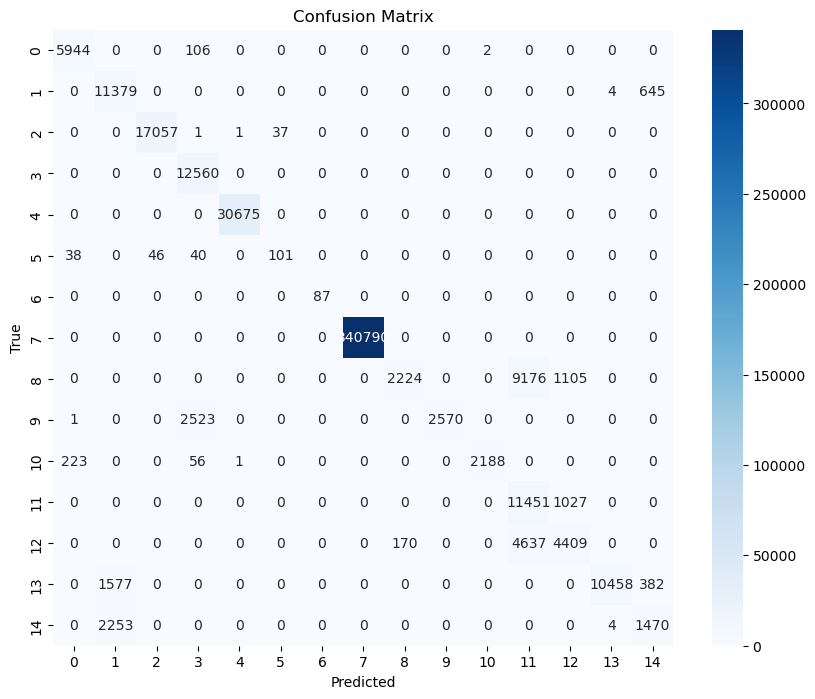

Completed
Time taken: 0:01:13.103120
Validation score: 0.9496143840408195
Evaluation score: [0.011622910387814045, 0.949614405632019]
Recall score: 0.9496143840408195
Precision score: 0.9625245716043782
F1 Measure score: 0.9452662588317005
ROC-AUC score: 0.8841606971390189
Evaluation score: [0.011622910387814045, 0.949614405632019]
Precision: 0.9625245716043782
Recall: 0.9496143840408195
F1 Score: 0.9452662588317005
ROC-AUC Score: 0.996296319284426

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      6052
           1       0.75      0.95      0.84     12028
           2       1.00      1.00      1.00     17096
           3       0.82      1.00      0.90     12560
           4       1.00      1.00      1.00     30675
           5       0.73      0.45      0.56       225
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00    340790
           8       0.93      0.18  

In [22]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import wandb
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dnn_fine_tune_validate_GAN')

start = dt.datetime.now()

escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

# Evaluate the model on the test set
escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
y_eval_classes = np.argmax(y_test, axis=1)

# Confusion matrix
conf_mat = confusion_matrix(y_eval_classes, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(n_classes)], yticklabels=[str(i) for i in range(n_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_eval_classes, pred_classes)

# Additional metrics
precision = precision_score(y_eval_classes, pred_classes, average='weighted')
recall = recall_score(y_eval_classes, pred_classes, average='weighted')
f1 = f1_score(y_eval_classes, pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, pred, multi_class='ovr')

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

# New metrics
print('Evaluation score:', escore)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC Score:', roc_auc)
print('\nClassification Report:\n', class_report)


In [17]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

import wandb

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dcnn_fine_tune')


K = keras.backend

X_train = X_train.reshape(X_train.shape[0], 91, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 91, 1).astype('float32')


# DCNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(_features, 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=128, kernel_size=6))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, activation = 'softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='loss', patience=10),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
    wandb.keras.WandbCallback()
]
def lr_schedule(epoch):
    if epoch < 20:
        return 0.0002  # First 30 epochs with this learning rate
    elif epoch < 40:
        return 0.0002/4  # Next 30 epochs with a lower learning rate
    else:
        return 0.0002/6  # Last 30 epochs with an even lower learning rate

lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(X_train, y_train,
                              batch_size=128,
                              epochs=50,
                              verbose=True, #callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, y_test),
                               callbacks=[callbacks, lr_scheduler])  

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 86, 128)           896       
                                                                 
 activation_12 (Activation)  (None, 86, 128)           0         
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 43, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_13 (Conv1D)          (None, 38, 256)           196864    
                                                                 
 activation_13 (Activation)  (None, 38, 256)           0         
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 19, 256)           0         
 ng1D)                                                

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 431s 38ms/step - loss: 0.1535 - accuracy: 0.9327 - val_loss: 0.1077 - val_accuracy: 0.9467 - lr: 2.0000e-04
Epoch 2/50
11189/11190 [============================>.] - ETA: 0s - loss: 0.1088 - accuracy: 0.9468

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 417s 37ms/step - loss: 0.1088 - accuracy: 0.9468 - val_loss: 0.1012 - val_accuracy: 0.9490 - lr: 2.0000e-04
Epoch 3/50
11190/11190 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9481

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 416s 37ms/step - loss: 0.1039 - accuracy: 0.9481 - val_loss: 0.1002 - val_accuracy: 0.9490 - lr: 2.0000e-04
Epoch 4/50
11190/11190 [==============================] - ETA: 0s - loss: 0.1020 - accuracy: 0.9484

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 414s 37ms/step - loss: 0.1020 - accuracy: 0.9484 - val_loss: 0.0998 - val_accuracy: 0.9493 - lr: 2.0000e-04
Epoch 5/50
11190/11190 [==============================] - ETA: 0s - loss: 0.1026 - accuracy: 0.9484

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 416s 37ms/step - loss: 0.1026 - accuracy: 0.9484 - val_loss: 0.0988 - val_accuracy: 0.9493 - lr: 2.0000e-04
Epoch 6/50
11189/11190 [============================>.] - ETA: 0s - loss: 0.1013 - accuracy: 0.9486

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 424s 38ms/step - loss: 0.1013 - accuracy: 0.9486 - val_loss: 0.0987 - val_accuracy: 0.9494 - lr: 2.0000e-04
Epoch 7/50
11190/11190 [==============================] - 410s 37ms/step - loss: 0.1011 - accuracy: 0.9487 - val_loss: 0.0989 - val_accuracy: 0.9492 - lr: 2.0000e-04
Epoch 8/50
11190/11190 [==============================] - 401s 36ms/step - loss: 0.1008 - accuracy: 0.9487 - val_loss: 0.1003 - val_accuracy: 0.9489 - lr: 2.0000e-04
Epoch 9/50
11190/11190 [==============================] - 407s 36ms/step - loss: 0.1012 - accuracy: 0.9487 - val_loss: 0.1016 - val_accuracy: 0.9486 - lr: 2.0000e-04
Epoch 10/50
11190/11190 [==============================] - 401s 36ms/step - loss: 0.1006 - accuracy: 0.9489 - val_loss: 0.0995 - val_accuracy: 0.9491 - lr: 2.0000e-04
Epoch 11/50
11190/11190 [==============================] - ETA: 0s - loss: 0.1004 - accuracy: 0.9488

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 404s 36ms/step - loss: 0.1004 - accuracy: 0.9488 - val_loss: 0.0987 - val_accuracy: 0.9493 - lr: 2.0000e-04
Epoch 12/50
11190/11190 [==============================] - 401s 36ms/step - loss: 0.0998 - accuracy: 0.9489 - val_loss: 0.0991 - val_accuracy: 0.9497 - lr: 2.0000e-04
Epoch 13/50
11189/11190 [============================>.] - ETA: 0s - loss: 0.1005 - accuracy: 0.9488

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 405s 36ms/step - loss: 0.1005 - accuracy: 0.9488 - val_loss: 0.0983 - val_accuracy: 0.9494 - lr: 2.0000e-04
Epoch 14/50
11190/11190 [==============================] - 404s 36ms/step - loss: 0.1004 - accuracy: 0.9491 - val_loss: 0.1000 - val_accuracy: 0.9495 - lr: 2.0000e-04
Epoch 15/50
11190/11190 [==============================] - 410s 37ms/step - loss: 0.0998 - accuracy: 0.9490 - val_loss: 0.0998 - val_accuracy: 0.9493 - lr: 2.0000e-04
Epoch 16/50
11190/11190 [==============================] - 405s 36ms/step - loss: 0.0999 - accuracy: 0.9488 - val_loss: 0.0985 - val_accuracy: 0.9494 - lr: 2.0000e-04
Epoch 17/50
11189/11190 [============================>.] - ETA: 0s - loss: 0.0997 - accuracy: 0.9489

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 408s 36ms/step - loss: 0.0997 - accuracy: 0.9489 - val_loss: 0.0983 - val_accuracy: 0.9495 - lr: 2.0000e-04
Epoch 18/50
11190/11190 [==============================] - ETA: 0s - loss: 0.0997 - accuracy: 0.9490

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 414s 37ms/step - loss: 0.0997 - accuracy: 0.9490 - val_loss: 0.0983 - val_accuracy: 0.9496 - lr: 2.0000e-04
Epoch 19/50
11190/11190 [==============================] - 428s 38ms/step - loss: 0.1001 - accuracy: 0.9491 - val_loss: 0.1001 - val_accuracy: 0.9485 - lr: 2.0000e-04
Epoch 20/50
11190/11190 [==============================] - 440s 39ms/step - loss: 0.1003 - accuracy: 0.9488 - val_loss: 0.0984 - val_accuracy: 0.9495 - lr: 2.0000e-04
Epoch 21/50
11190/11190 [==============================] - ETA: 0s - loss: 0.0989 - accuracy: 0.9494

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 455s 41ms/step - loss: 0.0989 - accuracy: 0.9494 - val_loss: 0.0979 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 22/50
11190/11190 [==============================] - 445s 40ms/step - loss: 0.0986 - accuracy: 0.9494 - val_loss: 0.0979 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 23/50
11189/11190 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9495

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 452s 40ms/step - loss: 0.0989 - accuracy: 0.9495 - val_loss: 0.0979 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 24/50
11190/11190 [==============================] - ETA: 0s - loss: 0.0985 - accuracy: 0.9495

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 431s 39ms/step - loss: 0.0985 - accuracy: 0.9495 - val_loss: 0.0977 - val_accuracy: 0.9499 - lr: 3.3333e-05
Epoch 25/50
11189/11190 [============================>.] - ETA: 0s - loss: 0.0994 - accuracy: 0.9494

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 447s 40ms/step - loss: 0.0994 - accuracy: 0.9494 - val_loss: 0.0977 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 26/50
11190/11190 [==============================] - 433s 39ms/step - loss: 0.0985 - accuracy: 0.9494 - val_loss: 0.0978 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 27/50
11190/11190 [==============================] - 453s 40ms/step - loss: 0.0984 - accuracy: 0.9495 - val_loss: 0.0980 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 28/50
11190/11190 [==============================] - 457s 41ms/step - loss: 0.0984 - accuracy: 0.9495 - val_loss: 0.0978 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 29/50
11190/11190 [==============================] - 440s 39ms/step - loss: 0.0985 - accuracy: 0.9493 - val_loss: 0.0977 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 30/50
11189/11190 [============================>.] - ETA: 0s - loss: 0.0984 - accuracy: 0.9496

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 453s 41ms/step - loss: 0.0984 - accuracy: 0.9496 - val_loss: 0.0977 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 31/50
11190/11190 [==============================] - 448s 40ms/step - loss: 0.0983 - accuracy: 0.9495 - val_loss: 0.0978 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 32/50
11190/11190 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9494

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 474s 42ms/step - loss: 0.0984 - accuracy: 0.9494 - val_loss: 0.0976 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 33/50
11190/11190 [==============================] - ETA: 0s - loss: 0.0983 - accuracy: 0.9494

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 485s 43ms/step - loss: 0.0983 - accuracy: 0.9494 - val_loss: 0.0976 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 34/50
11190/11190 [==============================] - 470s 42ms/step - loss: 0.0984 - accuracy: 0.9495 - val_loss: 0.0977 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 35/50
11190/11190 [==============================] - ETA: 0s - loss: 0.0982 - accuracy: 0.9495

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 476s 43ms/step - loss: 0.0982 - accuracy: 0.9495 - val_loss: 0.0976 - val_accuracy: 0.9496 - lr: 3.3333e-05
Epoch 36/50
11190/11190 [==============================] - 455s 41ms/step - loss: 0.0983 - accuracy: 0.9495 - val_loss: 0.0977 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 37/50
11190/11190 [==============================] - ETA: 0s - loss: 0.1003 - accuracy: 0.9495

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\Momrez\Downloads\Osman\cyber security Edge-IIoTset\wandb\run-20231213_114149-nsia3b4y\files\model-best)... Done. 0.0s


11190/11190 [==============================] - 450s 40ms/step - loss: 0.1003 - accuracy: 0.9495 - val_loss: 0.0975 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 38/50
11190/11190 [==============================] - 447s 40ms/step - loss: 0.0982 - accuracy: 0.9494 - val_loss: 0.0976 - val_accuracy: 0.9498 - lr: 3.3333e-05
Epoch 39/50
11190/11190 [==============================] - 446s 40ms/step - loss: 0.0983 - accuracy: 0.9495 - val_loss: 0.0976 - val_accuracy: 0.9497 - lr: 3.3333e-05
Epoch 40/50
 3048/11190 [=======>......................] - ETA: 4:37 - loss: 0.0986 - accuracy: 0.9492

KeyboardInterrupt: 

In [18]:
model.save('model3_dcnn.h5')

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


accuracy,▁▇▇▇▇██████████████████████████████████
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr,████████████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▆▆▇▇▇▇▆▅▆▇█▇▇▇▇▇▇▅▇█▇████▇███████▇████
val_loss,█▄▃▃▂▂▂▃▄▂▂▂▂▃▃▂▂▂▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.94949
best_epoch,36
best_val_loss,0.09751
epoch,38
loss,0.0983


14920/14920 [==============================] - 51s 3ms/step


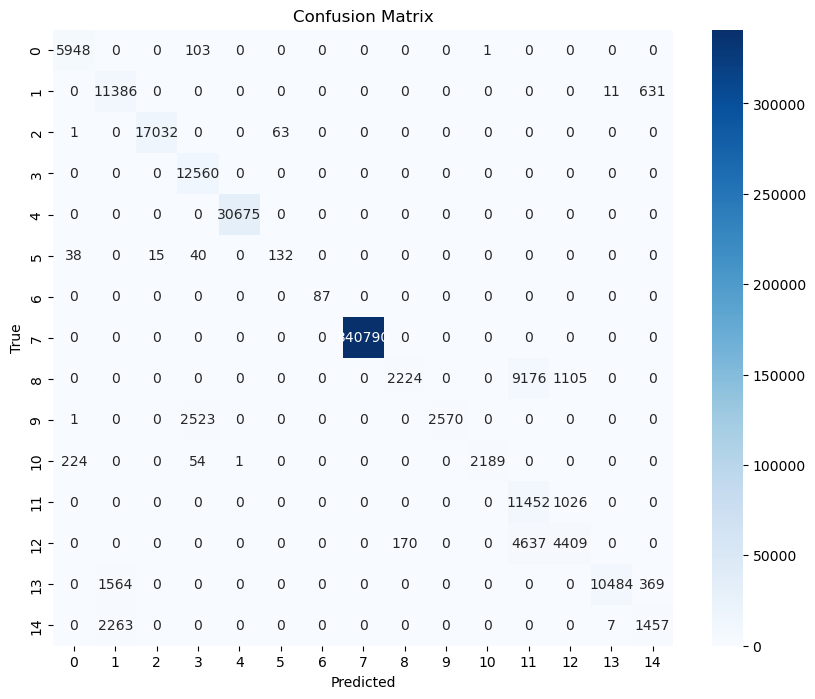

Completed
Time taken: 0:03:50.287325
Validation score: 0.9496814112580589
Evaluation score: [0.09798822551965714, 0.9496814012527466]
Recall score: 0.9496814112580589
Precision score: 0.9625908599029793
F1 Measure score: 0.9453412264790555
ROC-AUC score: 0.8887180129734201
Evaluation score: [0.09798822551965714, 0.9496814012527466]
Precision: 0.9625908599029793
Recall: 0.9496814112580589
F1 Score: 0.9453412264790555
ROC-AUC Score: 0.996329742910279

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      6052
           1       0.75      0.95      0.84     12028
           2       1.00      1.00      1.00     17096
           3       0.82      1.00      0.90     12560
           4       1.00      1.00      1.00     30675
           5       0.68      0.59      0.63       225
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00    340790
           8       0.93      0.18  

In [21]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import wandb
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Log in to WandB
wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# Initialize WandB run
wandb.init(project='dcnn_fine_tune_validate')

start = dt.datetime.now()

escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

# Evaluate the model on the test set
escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
y_eval_classes = np.argmax(y_test, axis=1)

# Confusion matrix
conf_mat = confusion_matrix(y_eval_classes, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(n_classes)], yticklabels=[str(i) for i in range(n_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_eval_classes, pred_classes)

# Additional metrics
precision = precision_score(y_eval_classes, pred_classes, average='weighted')
recall = recall_score(y_eval_classes, pred_classes, average='weighted')
f1 = f1_score(y_eval_classes, pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, pred, multi_class='ovr')

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

# New metrics
print('Evaluation score:', escore)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC Score:', roc_auc)
print('\nClassification Report:\n', class_report)


In [23]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

import wandb

# # Log in to WandB
# wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# # Initialize WandB run
# wandb.init(project='dcnn_fine_tune_GAN1')


K = keras.backend

X_train2 = X_train2.reshape(X_train2.shape[0], 91, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 91, 1).astype('float32')


# DCNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(_features, 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=128, kernel_size=6))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, activation = 'softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='loss', patience=10),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
    # wandb.keras.WandbCallback()
]
def lr_schedule(epoch):
    if epoch < 15:
        return 0.0002  # First 30 epochs with this learning rate
    elif epoch < 23:
        return 0.0002/4  # Next 30 epochs with a lower learning rate
    else:
        return 0.0002/6  # Last 30 epochs with an even lower learning rate

lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(X_train2, y_train2,
                              batch_size=128,
                              epochs=30,
                              verbose=True, #callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, y_test),
                               callbacks=[callbacks, lr_scheduler])  



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 86, 128)           896       
                                                                 
 activation (Activation)     (None, 86, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 43, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 256)           196864    
                                                                 
 activation_1 (Activation)   (None, 38, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 19, 256)           0         
 g1D)                                                 

In [24]:
model.save('model3_dcnn_gan.h5')

C:\Users\Momrez\anaconda3\envs\new\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14920/14920 [==============================] - 51s 3ms/step


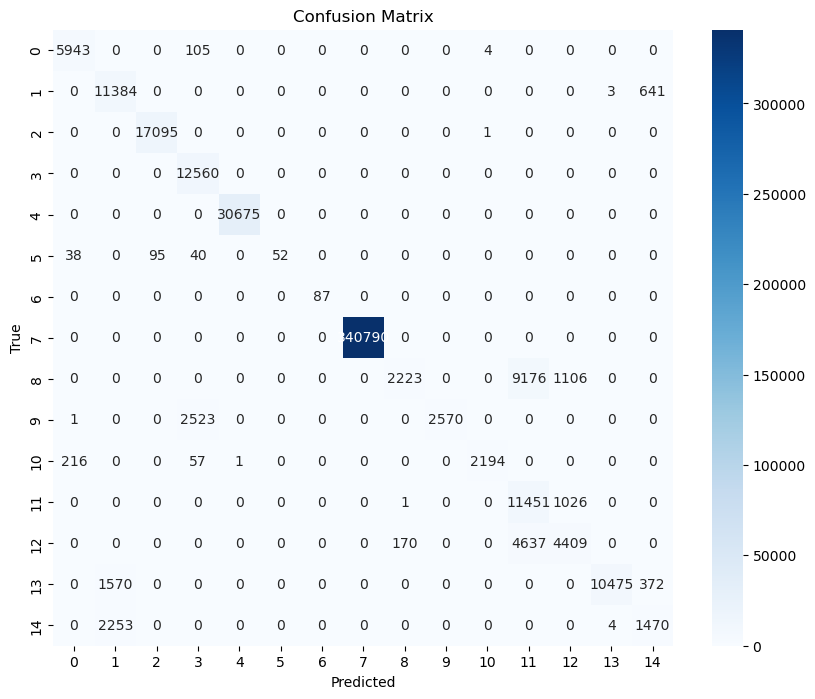

Completed
Time taken: 0:03:43.653722
Validation score: 0.9496458030489006
Evaluation score: [0.09804890304803848, 0.9496458172798157]
Recall score: 0.9496458030489006
Precision score: 0.9625876912260931
F1 Measure score: 0.9452190679872052
ROC-AUC score: 0.8771088396907325
Evaluation score: [0.09804890304803848, 0.9496458172798157]
Precision: 0.9625876912260931
Recall: 0.9496458030489006
F1 Score: 0.9452190679872052
ROC-AUC Score: 0.9963096289170353

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      6052
           1       0.75      0.95      0.84     12028
           2       0.99      1.00      1.00     17096
           3       0.82      1.00      0.90     12560
           4       1.00      1.00      1.00     30675
           5       1.00      0.23      0.38       225
           6       1.00      1.00      1.00        87
           7       1.00      1.00      1.00    340790
           8       0.93      0.18 

In [26]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import wandb
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# # Log in to WandB
# wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# # Initialize WandB run
# wandb.init(project='dcnn_fine_tune_validate-GAN')

start = dt.datetime.now()

escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

# Evaluate the model on the test set
escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
y_eval_classes = np.argmax(y_test, axis=1)

# Confusion matrix
conf_mat = confusion_matrix(y_eval_classes, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(n_classes)], yticklabels=[str(i) for i in range(n_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_eval_classes, pred_classes)

# Additional metrics
precision = precision_score(y_eval_classes, pred_classes, average='weighted')
recall = recall_score(y_eval_classes, pred_classes, average='weighted')
f1 = f1_score(y_eval_classes, pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, pred, multi_class='ovr')

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

# New metrics
print('Evaluation score:', escore)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC Score:', roc_auc)
print('\nClassification Report:\n', class_report)


In [ ]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler

import wandb

# # Log in to WandB
# wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# # Initialize WandB run
# wandb.init(project='dcnn_fine_tune_smote')


K = keras.backend

X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], 91, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 91, 1).astype('float32')


# DCNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(_features, 1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=128, kernel_size=6))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, activation = 'softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='loss', patience=10),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001),
    # wandb.keras.WandbCallback()
]
def lr_schedule(epoch):
    if epoch < 15:
        return 0.0002  # First 30 epochs with this learning rate
    elif epoch < 23:
        return 0.0002/4  # Next 30 epochs with a lower learning rate
    else:
        return 0.0002/6  # Last 30 epochs with an even lower learning rate

lr_scheduler = LearningRateScheduler(lr_schedule)

history = model.fit(X_train_resampled, y_train_resampled,
                              batch_size=128,
                              epochs=30,
                              verbose=True, #callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, y_test),
                               callbacks=[callbacks, lr_scheduler])  



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 86, 128)           896       
                                                                 
 activation (Activation)     (None, 86, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 43, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 256)           196864    
                                                                 
 activation_1 (Activation)   (None, 38, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 19, 256)           0         
 g1D)                                                 

In [ ]:
model.save('model3_dcnn_smote.h5')

In [ ]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import wandb
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Log in to WandB
# wandb.login(key='8f0d6e889f9698caf1173751c1e03e59c7f70277')

# # Initialize WandB run
# wandb.init(project='dcnn_fine_tune_validate-GAN')

start = dt.datetime.now()

escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

# Evaluate the model on the test set
escore = model.evaluate(X_test, y_test, batch_size=32)
pred = model.predict(X_test)
pred_classes = np.argmax(pred, axis=1)
y_eval_classes = np.argmax(y_test, axis=1)

# Confusion matrix
conf_mat = confusion_matrix(y_eval_classes, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(n_classes)], yticklabels=[str(i) for i in range(n_classes)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_eval_classes, pred_classes)

# Additional metrics
precision = precision_score(y_eval_classes, pred_classes, average='weighted')
recall = recall_score(y_eval_classes, pred_classes, average='weighted')
f1 = f1_score(y_eval_classes, pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, pred, multi_class='ovr')

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

# New metrics
print('Evaluation score:', escore)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC Score:', roc_auc)
print('\nClassification Report:\n', class_report)
